In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
birth = pd.read_csv('subsampled_clean_data.csv')

In [3]:
birth.head()

,Unnamed: 0,ATTEND,BFACIL,BMI,DBWT,DMAR,FAGECOMB,FEDUC,FRACE6,LD_INDL,...,PRIORLIVE,PRIORTERM,RDMETH_REC,RESTATUS,RF_CESAR,SEX,PREG_LEN,WTGAIN_PER,CIG,FIRST_BIRTH
0,2780164,1,1,31.4,3670,1,29,6,1,N,...,False,False,1,2,N,M,9,0.000000,False,True
1,1306496,2,1,27.6,3494,1,34,4,1,Y,...,True,False,1,1,N,F,9,0.120482,False,False
2,3027006,1,1,27.1,3374,2,43,2,1,N,...,True,True,1,1,N,M,10,0.061350,True,False
3,903600,1,1,26.8,3520,1,30,3,1,Y,...,False,True,1,1,N,M,9,0.301282,False,True
4,2813944,1,1,21.3,3140,1,30,5,1,N,...,False,False,1,3,N,M,9,0.208333,False,True


Tasks:
1.  Visualize at least two quantitative variables and two categorical variables. Your visualizations must be relevant to your research questions!
2.  Describe any trends you observe, and any relationships you may want to follow up on.
3. Describe any data cleaning steps you took. How will these decisions impact your models and inferences? (This is in preprocessing.ipynb)
4.  Explain how your visualizations should be relevant to your research questions: either by motivating the question, or suggesting a potential answer. You must explain why they are relevant.

# Quantitative Variables

## Birth Weight – Detail in Grams (DBWT)

Text(0.5, 1.0, 'Birth Weight-Detail in Grams')

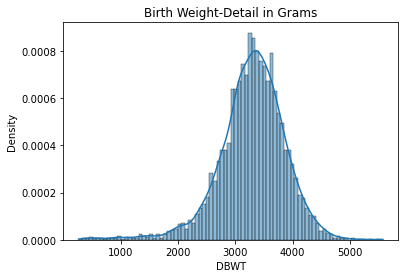

In [59]:
sns.histplot(birth['DBWT'], stat = 'density', kde = True)
plt.title("Birth Weight-Detail in Grams")

In [60]:
#Mean
np.mean(birth['DBWT'])

3291.9113

In [61]:
#SD
np.std(birth['DBWT'])

578.2338821206437

In [62]:
#min and max
np.min(birth['DBWT']), np.max(birth['DBWT'])

(269, 5570)

From the histogram above, we see that the birth weight is rougly normally distributed with mean = 3292 and standard deviation = 578. We can see that it is slightly skewed to the left, with minimum weight at 269; this is an interesting trend that we can follow up in order to answer our first research question ("Does smoking cause lower birth weights?"). Our second research question ("Predicting a baby's birth weight from Mother’s Single Years of Age and Number of Prenatal Visits, comparing GLMs to nonparametric methods.") is attempting to predict birth weight, so we can use this histogram to help us perform model checking.

## Mother’s Single Years of Age (MAGER)

Text(0.5, 1.0, "Mother's Single Years of Age")

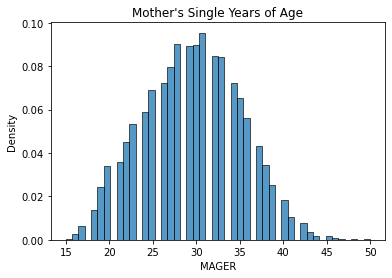

In [63]:
sns.histplot(birth['MAGER'], stat = 'density')
plt.title("Mother's Single Years of Age")

In [64]:
#Mean
np.mean(birth['MAGER'])

29.5224

In [65]:
#SD
np.std(birth['MAGER'])

5.5782164031166985

In [66]:
#min and max
np.min(birth['MAGER']), np.max(birth['MAGER'])

(15, 50)

From the histogram above, we see that the mother's age is rougly normally distributed as well with mean around 19.5 and standard deviation around 5.6. We can see that it is slightly skewed to the right, with maximum age at 50; this is an interesting trend that we can follow up for our second research question ("Predicting a baby's birth weight from Mother’s Single Years of Age and Number of Prenatal Visits, comparing GLMs to nonparametric methods."). We can use this to help us answer if older mother is likely to have babies with lighter birth weights.

## Number of Prenatal Visits - PREVIS

Text(0.5, 1.0, 'Number of Prenatal Visits')

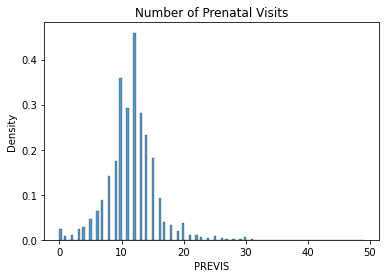

In [70]:
sns.histplot(birth['PREVIS'], stat = 'density')
plt.title("Number of Prenatal Visits")

In [71]:
#Mean
np.mean(birth['PREVIS'])

11.647

In [72]:
#SD
np.std(birth['PREVIS'])

3.9570937567866395

In [57]:
#min and max
np.min(birth['PREVIS']), np.max(birth['PREVIS'])

(0, 49)

From the histogram above, we see that the number of prenatal visits is rougly normally distributed with mean around 11.65 and standard deviation around 3.96. We can see that there is an outlier in the data: one family has 49 prenatal visits. This is an interesting observation for our research question. We can use this to help us answer if more prenatal visits is likely to increase a baby's birth weights.

# Categorical Variables

## Smoking Before Pregnancy - CIG

As we have done in `preprocessing.ipynb`, the number of cigarettes before pregnancy (CIG-0) is binarized into `True` (having greater than or equal to 1 cigarette) and `False` (not having any cigarettes). 

Text(0.5, 1.0, 'Smoking Before Pregnancy')

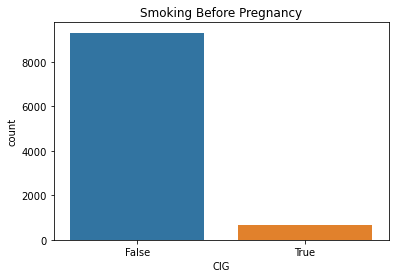

In [73]:
sns.countplot(x = birth['CIG'])
plt.title("Smoking Before Pregnancy")

In [13]:
#Number of Smokers
np.sum(birth['CIG'] == 1)

682

In [14]:
#Number of Non-smokers
np.sum(birth['CIG'] == 0)

9318

In [42]:
#Percentage of each category
freq = birth['CIG'].value_counts()
perc = freq/sum(freq)
perc

False    0.9318
True     0.0682
Name: CIG, dtype: float64

From the Bar Chart above, we can see that 93.18% of mother don't smoke before pregnancy, while 6.82% do smoke. The significant difference between number of smokers and non-smokers is something we need to take into account when analyzing the effect of smoking on baby weights. This data will help us addresss our first research question ("Does smoking cause lower birth weights?").

## First Birth - FIRST_BIRTH

As we have done in `preprocessing.ipynb`, the time interval since last other pregnancy (ILLB_R) is binarized into `True` (the babt is the first child) and `False` (not being the first child).

Text(0.5, 1.0, 'First Birth Child')

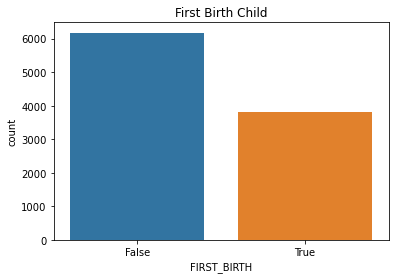

In [74]:
sns.countplot(x = birth['FIRST_BIRTH'])
plt.title("First Birth Child")

In [44]:
#Number of First Birth
np.sum(birth['FIRST_BIRTH'] == 1)

3823

In [45]:
#Number of None First Birth
np.sum(birth['FIRST_BIRTH'] == 0)

6177

In [46]:
#Percentage of each category
freq = birth['FIRST_BIRTH'].value_counts()
perc = freq/sum(freq)
perc

False    0.6177
True     0.3823
Name: FIRST_BIRTH, dtype: float64

From the Bar Chart above, we can see that there are more families giving birth to their non-first child than their first child: 61.77% of family has already have one or more than one babies, while 38.23% gives birth to their first child. This helps us investigate the effect of being the first-born on birth weights as it could be a potential useful feature to predict baby weights.

## Sex of Infant - SEX

Text(0.5, 1.0, "Babies' Biological Gender")

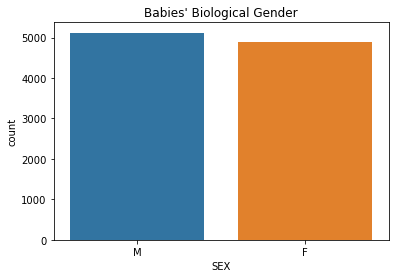

In [75]:
sns.countplot(x = birth['SEX'])
plt.title("Babies' Biological Gender")

In [48]:
#Number of Males
np.sum(birth['SEX'] == 'M')

5119

In [49]:
#Number of Females
np.sum(birth['SEX'] == 'F')

4881

In [50]:
#Percentage of each category
freq = birth['SEX'].value_counts()
perc = freq/sum(freq)
perc

M    0.5119
F    0.4881
Name: SEX, dtype: float64

From the bar chat above, we can see that there isn't a big difference between the number of female babies and the number of male babies, with 51.19% of them as males and 48.81% of them being females. The biological sex of a baby is a useful feature that may influece a baby's birth weight.